# Q-5. 

### Business Understanding:

    In this problem statement we have to build a model which can predict the high booking area using an unsupervised algorithm and price for the location using a supervised algorithm.

In [19]:
# Importing libraries

import pandas as pd
import numpy as np

import folium
import matplotlib.pyplot as plt

# sk-learn libraries
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [18]:
df = pd.read_csv('D:\\FSDS-iNeuron\\3.Resource\\Dataset\\rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


### Let's Understand the data

**Dataset information:**

This dataset is a sample dataset for Uber & Lyft price pings.

#### Feature Information:

**id**: Unique Identifier for each column

**timestamp**: Unix Timestamp

**hour**: Hour of the day

**day**: Day of the week

**month**: Month in a year

**datetime**: Date value

**timezone**: Timezone

**source**: Initial source of the ride

**destination**: Destination of the ride

**cab_type**: The type of cab

## Basic analysis and data preprocessing

In [20]:
# Shape of the data

df.shape

(693071, 57)

In [21]:
# Columns of the data

df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [22]:
# datatypes of the dataframe

df.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [23]:
# Checking null values

df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

#### Observation
- price column has 55095 number of missing values

In [24]:
# Dropping null values

df.dropna(axis=0,inplace=True)

In [25]:
df.isna().sum().sum()

0

In [26]:
# Checking duplicates column

df.duplicated().sum()

0

In [27]:
# Basinc information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [28]:
# For categorical features

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print(categorical_features)

['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']


In [29]:
# For numerical features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
print(numerical_features)

['timestamp', 'hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']


In [30]:
# Summerizing the dataset
from skimpy import skim


skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 637976 │ │ float64     │ 29    │                                                          │
│ │ Number of columns │ 57     │ │ int32       │ 17    │                                                          │
│ └───────────────────┴────────┘ │ string      │ 11    │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name ┃ NA ┃ NA % ┃ mean       ┃ sd     ┃ p0         ┃ p25        ┃ p75        ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ timestamp   │  0 │    0 │ 1500000000 │ 690000 │ 1500000000 │ 1500000000 │ 1500000000 │ 1500000000 │ █▆▁ ▃▆ │  │
│ │ hour        │  0 │    0 │         12 │    6.9 │          0 │          6 │         18 │         23 │ █▇████ │  │
│ │ day         │  0 │    0 │         18 │     10 │          1 │         13 │         28 │         30 │ ▄ ▄▄ █ │  │
│ │ month       │  0 │    0 │         12 │   0.49 │         11 │         11 │         12 │         12 │ ▆    █ │  │
│ │ price       │  0 │    0 │         17 │    9.3 │        2.5 │          9 │         22 │         98 │   █▄   │  │
│ │ distance    │  0 │    0 │        2.2 │    1.1 │       0.02 │        1.3 │        2.9 │        7.9 │  ▅█▆▁  │  │
│ │ surge_multi │  0 │    0 │          1 │  0.095 │          1 │          1 │          1 │          3 │   █    │  │
│ │ plier       │    │      │            │        │            │            │            │            │        │  │
│ │ latitude    │  0 │    0 │         42 │  0.048 │         42 │         42 │         42 │         42 │ ▁    █ │  │
│ │ longitude   │  0 │    0 │        -71 │   0.02 │        -71 │        -71 │        -71 │        -71 │ ▄▁▄█▇▄ │  │
│ │ temperature │  0 │    0 │         40 │    6.7 │         19 │         36 │         44 │         57 │ ▁▂▄█▃▁ │  │
│ │ apparentTem │  0 │    0 │         36 │    7.9 │         12 │         32 │         40 │         57 │ ▁▁▇█▃▁ │  │
│ │ perature    │    │      │            │        │            │            │            │            │        │  │
│ │ precipInten │  0 │    0 │     0.0089 │  0.027 │          0 │          0 │          0 │       0.14 │   █    │  │
│ │ sity        │    │      │            │        │            │            │            │            │        │  │
│ │ precipProba │  0 │    0 │       0.15 │   0.33 │          0 │          0 │          0 │          1 │ █    ▁ │  │
│ │ bility      │    │      │            │        │            │            │            │            │        │  │
│ │ humidity    │  0 │    0 │       0.74 │   0.14 │       0.38 │       0.64 │       0.88 │       0.96 │ ▁▃▆▇▄█ │  │
│ │ windSpeed   │  0 │    0 │        6.2 │    3.1 │       0.45 │        3.4 │        8.4 │         15 │ ▅█▆▇▂▁ │  │
│ │ windGust    │  0 │    0 │        8.5 │    5.3 │        0.8 │        4.1 │         12 │         27 │ █▇▄▂▁▁ │  │
│ │ windGustTim │  0 │    0 │ 1500000000 │ 690000 │ 1500000000 │ 1500000000 │ 1500000000 │ 1500000000 │ █▇▂ ▂█ │  │
│ │ e           │    │      │            │        │     

### Data Preprocessing

In [31]:
# Select relevant columns for clustering and price prediction

cluster_cols = ['latitude', 'longitude']
price_cols = ['latitude', 'longitude', 'hour', 'day', 'month', 'price']

In [32]:
# Normalize the clustering features 

df_normalized = (df[cluster_cols] - df[cluster_cols].mean()) / df[cluster_cols].std()

In [34]:
# Determine the optimal number of clusters using the elbow method

distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)    # Create an instance of the KMeans clustering algorithm with the specified number of clusters k
    kmeans.fit(df_normalized)    # Fitting the KMeans model to the normalized dataset 
    distortions.append(kmeans.inertia_)    # inertia is a measure of how tightly grouped the data points are within each cluster.

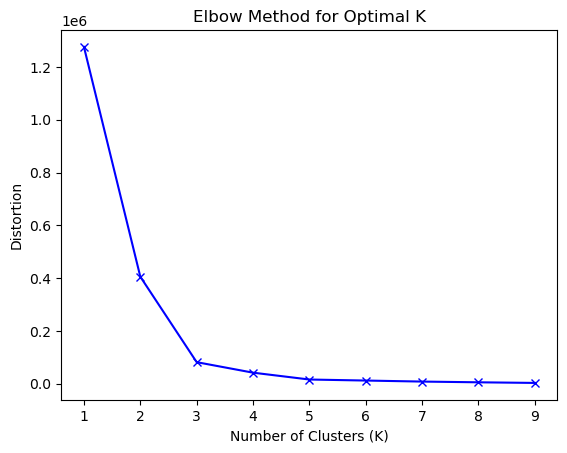

In [14]:
# Plotting the elbow curve

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

#### Observation: 
- The optimal k value is 4

In [15]:

# Perform K-means clustering

kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)
cluster_labels = kmeans.labels_

In [16]:
# Add cluster labels to the DataFrame

df['cluster_label'] = cluster_labels

### Supervised Learning - Price Prediction (Random Forest Regression)

In [17]:
# Split the dataset into training and testing sets

X = df[price_cols[:-1]]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Train a Random Forest Regression model

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)    

RandomForestRegressor()

In [19]:
# Predict prices for the testing set

y_pred = rf_model.predict(X_test)

In [20]:
# Evaluate the model's performance

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 87.23720016355277


### Map Visualization

In [21]:
# Create a map centered on the mean latitude and longitude

m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

In [22]:
# Add data points to the map

for index, row in df.iterrows():
    popup_text = f"Price: {row['price']}"
    marker = folium.Marker([row['latitude'], row['longitude']], popup=popup_text)
    marker.add_to(m)

In [ ]:
# Save the map

m.save('map.html')

In [ ]:
import folium

# Create a map object
m = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

# Add a marker
folium.Marker([51.5074, -0.1278], popup='London').add_to(m)

# Display the map
m